# Optimization

In this page, I made a few test of optimization methods.

The examples are coming from https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html


### Multivariate functions

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
     """The Rosenbrock function"""
     return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [4]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [5]:
res = minimize(rosen, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [7]:
print(res.x)

[ 1.  1.  1.  1.  1.]


### Constrained optimization

In [8]:
def func(x, sign=1.0):
     """ Objective function """
     return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

In [10]:
def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

In [13]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

In [11]:
# No constraints

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[ 2.  1.]


In [14]:
# With constraints

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               constraints=cons, method='SLSQP', options={'disp': True})

print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[ 1.00000009  1.        ]


### Minimize a scalar

-2.9999960098


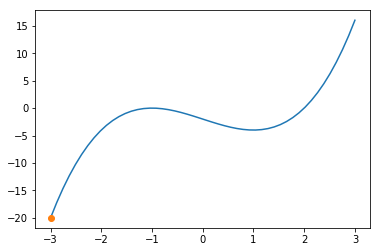

In [23]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

f = lambda x: (x - 2) * (x + 1)**2

#res = minimize_scalar(f, method='brent')
res = minimize_scalar(f, bounds=(-3, -1), method='bounded' )

print(res.x)

x=np.linspace(-3,3)
plt.plot(x,f(x),res.x,f(res.x),'o')
plt.show()

### Least-square fit

In [ ]:


from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])

res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

res = least_squares(fun, x0, bounds=(0, 100), args=(u, y), verbose=1)

res.x
